## test with train_ver1 data combined with dev the test_train_split

In [ ]:
import pandas as pd
import numpy as np

In [105]:
train = pd.read_csv('./datas/train_ver1', index_col=[0])
train.tail()

,comments,bias_label,gender_label,hate_label,news_title,comment_pos,title_pos
7891,"힘내세요,응원합니다",none,False,none,"허지웅 허투루 넘길 말 없었다,솔직하게 드러냈던 속 사정","[('힘내세요', 'Verb'), (',', 'Punctuation'), ('응원'...","[('허지웅', 'Noun'), ('허투루', 'Noun'), ('넘길', 'Ver..."
7892,"힘내세요,삼가 고인의 명복을 빕니다",none,False,none,이혜경 오 캐롤 공연 중 남편 오정욱 부 고 오열 속 발인 종합,"[('힘내세요', 'Verb'), (',', 'Punctuation'), ('삼가'...","[('이혜경', 'Noun'), ('오', 'Noun'), ('캐롤', 'Noun'..."
7893,힘내세용 항상 응원합니닷,none,False,none,설경구 송윤아 아들과 즐거운 하루 전 엄마니까요,"[('힘내세용', 'Verb'), ('항상', 'Noun'), ('응원', 'Nou...","[('설경구', 'Noun'), ('송윤아', 'Noun'), ('아들', 'Nou..."
7894,"힘내 소연기로 답해요,나도 53살 인데 이런 일 저런 일 다 있더라구 요인격을 믿습...",none,False,none,SC 현장 연예인 인생 협박 유감 미소 잃은 최민수 보복운전 혐의 2차 공판 종합,"[('힘내', 'Verb'), ('소', 'Modifier'), ('연기', 'No...","[('SC', 'Alpha'), ('현장', 'Noun'), ('연예인', 'Nou..."
7895,힘들면 관뒀어야지 그게 현명한 거다,none,False,none,단독 스태프 사망 사고 서른 이지만 결국 오늘 촬영 취소,"[('힘들면', 'Adjective'), ('관', 'Noun'), ('뒀어야지',...","[('단독', 'Noun'), ('스태프', 'Noun'), ('사망', 'Noun..."


In [106]:
dev = pd.read_csv('./datas/dev.hate.csv')
dev.rename(columns={'label': 'hate_label'}, inplace=True)
dev.tail()

,comments,hate_label
466,지현우 범죄 저지르지 않았나요?,offensive
467,여자인생 망칠 일 있나 ㅋㅋ,hate
468,근데 전라도에서 사고가 났는데 굳이 서울까지 와서 병원에 가느 이유는?,offensive
469,"할매젖x, 뱃살x, 몸매 s라인, 유륜은 적당해야됨(너무크거나 너무 작아도 x), ...",hate
470,남자가 잘못한거라면... 반성도 없다면...나였다면 ... 여자처럼 아주 못되게 할...,none


In [107]:
train.drop(columns=(['bias_label', 'gender_label', 'news_title', 'comment_pos', 'title_pos']), inplace=True)
train = train.append(dev, ignore_index=True)
train.tail()

,comments,hate_label
8362,지현우 범죄 저지르지 않았나요?,offensive
8363,여자인생 망칠 일 있나 ㅋㅋ,hate
8364,근데 전라도에서 사고가 났는데 굳이 서울까지 와서 병원에 가느 이유는?,offensive
8365,"할매젖x, 뱃살x, 몸매 s라인, 유륜은 적당해야됨(너무크거나 너무 작아도 x), ...",hate
8366,남자가 잘못한거라면... 반성도 없다면...나였다면 ... 여자처럼 아주 못되게 할...,none


In [108]:
train.shape

(8367, 2)

In [109]:
train.index = range(8367)
train['comments'].apply(lambda x: len(x.split(' '))).sum()

92599

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

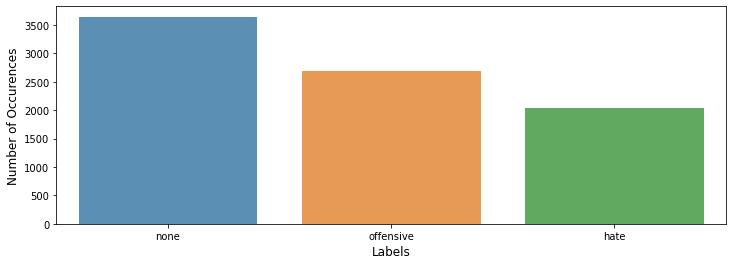

In [111]:
labels = train['hate_label'].value_counts()

plt.figure(figsize=(12,4))
sns.barplot(labels.index, labels.values, alpha=0.8)
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('Labels', fontsize=12)
plt.show()

In [112]:
def print_comment(index):
    example = train[train.index == index][['comments', 'hate_label']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Label: ', example[1])

In [113]:
print_comment(12)

13살 차이면 요즘 세상에 놀랄 일도 아니네요
Label:  none


In [114]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(train, test_size=0.2, random_state=42)

In [115]:
## unlabeled test data for kaggle competition testing

# test_df = pd.read_csv('./datas/test.hate.no_label.csv')
# test_df.tail()

In [116]:
from konlpy.tag import Okt
t = Okt()

def t_tokenizer(text):
    tokens_ko = t.morphs(text)
    return tokens_ko

In [117]:
# use train + dev data then train_test_split

from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

train_tagged = train.apply(lambda r: TaggedDocument(words=t_tokenizer(r['comments']), tags=[r.hate_label]), axis=1)
test_tagged = test.apply(lambda r: TaggedDocument(words=t_tokenizer(r['comments']), tags=[r.hate_label]), axis=1)

In [52]:
## test on unlabeled test data

# from gensim.models import Doc2Vec
# from gensim.models.doc2vec import TaggedDocument

# train_tagged = train.apply(lambda r: TaggedDocument(words=t_tokenizer(r['comments']), tags=[r.hate_label]), axis=1)
# test_df_tagged = test_df.apply(lambda r: TaggedDocument(words=t_tokenizer(r['comments']), tags=['None']), axis=1)

In [118]:
train_tagged.values[0], train_tagged.values[30], train_tagged.values[90]

(TaggedDocument(words=['저', '는', '애초', '에', '믿지도', '않았어요', ',', '걱정', '마시고', '힘내세요', ',', '응원', '합니다', ',', '나', '영석', 'PD', '님', '정유미', '님'], tags=['none']),
 TaggedDocument(words=['솔직히', '정세운', '떨어진', '게', '제일', '이상했어'], tags=['none']),
 TaggedDocument(words=['언제', '나오는', '고', '보고', '싶어', '용', '두', '분'], tags=['none']))

In [119]:
# test_df_tagged.values[0]

In [120]:
import multiprocessing
from tqdm import tqdm
from sklearn import utils

cores = multiprocessing.cpu_count()
model_dbow = Doc2Vec(dm=1, vector_size=500, negative=5, hs=0, min_count=10, sample=0, workers=cores)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 6693/6693 [00:00<00:00, 3336004.36it/s]


In [121]:
%%time
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 6693/6693 [00:00<00:00, 3347939.97it/s]
Wall time: 18.1 s


In [122]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [57]:
## modeling for the unlabeled test data

# from sklearn.linear_model import LogisticRegression

# y_train, X_train = vec_for_learning(model_dbow, train_tagged)
# y_test, X_test = vec_for_learning(model_dbow, test_df_tagged)

# lr = LogisticRegression(n_jobs=1, C=1e5, solver='sag', penalty='l2')
# lr.fit(X_train, y_train)
# y_pred= lr.predict(X_test)

In [123]:
# from sklearn.metrics import accuracy_score, f1_score

from sklearn.linear_model import LogisticRegression

y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)

lr = LogisticRegression(n_jobs=1, C=1e5, solver='sag', penalty='l2')
lr.fit(X_train, y_train)
y_pred= lr.predict(X_test)

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing f1-score: {}'.format(f1_score(y_test, y_pred, average='macro')))

Testing accuracy 0.557347670250896
Testing f1-score: 0.5220460734729401


In [124]:
model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=500, window=5, negative=5, min_count=10, workers=8, alpha=0.025, min_alpha=0.00025)
model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 6693/6693 [00:00<00:00, 6698276.47it/s]


In [125]:
%%time
for epoch in range(30):
    model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dmm.alpha -= 0.002
    model_dmm.min_alpha = model_dmm.alpha

100%|██████████| 6693/6693 [00:00<00:00, 2228328.04it/s]
Wall time: 17.8 s


In [63]:
## modeling for the unlabeled test data

# y_train, X_train = vec_for_learning(model_dmm, train_tagged)
# y_test, X_test = vec_for_learning(model_dmm, test_df_tagged)

# lr.fit(X_train, y_train)
# y_pred= lr.predict(X_test)

In [126]:
y_train, X_train = vec_for_learning(model_dmm, train_tagged)
y_test, X_test = vec_for_learning(model_dmm, test_tagged)

lr.fit(X_train, y_train)
y_pred= lr.predict(X_test)

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing f1-score: {}'.format(f1_score(y_test, y_pred, average='macro')))

Testing accuracy 0.5692951015531661
Testing f1-score: 0.5433824809761973


In [127]:
model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

In [128]:
from gensim.test.test_doc2vec import ConcatenatedDoc2Vec
new_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])

In [129]:
def get_vectors(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [68]:
## modeling for the unlabeled test data

# y_train, X_train = get_vectors(new_model, train_tagged)
# y_test, X_test = get_vectors(new_model, test_df_tagged)

# lr.fit(X_train, y_train)
# y_pred= lr.predict(X_test)

# len(y_pred)

In [130]:
y_train, X_train = get_vectors(new_model, train_tagged)
y_test, X_test = get_vectors(new_model, test_tagged)

lr.fit(X_train, y_train)
y_pred= lr.predict(X_test)

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing f1-score: {}'.format(f1_score(y_test, y_pred, average='macro')))

Testing accuracy 0.572879330943847
Testing f1-score: 0.5469422390522397


In [74]:
## applying to unlabeled test data for kaggle upload

y_pred = pd.DataFrame(y_pred)
y_pred[y_pred[0] == 'none'] = 0
y_pred[y_pred[0] == 'offensive'] = 1
y_pred[y_pred[0] == 'hate'] = 2

In [75]:
y_pred['comments'] = test_df['comments']
y_pred = y_pred[['comments', 0]]
y_pred.rename(columns={0: 'label'}, inplace=True)
y_pred.tail()

,comments,label
969,대박 게스트... 꼭 봐야징~ 컨셉이 바뀌니깐 재미지넹,0
970,성형으로 다 뜯어고쳐놓고 예쁜척. 성형 전 니 얼굴 다 알고있다. 순자처럼 된장냄새...,1
971,분위기는 비슷하다만 전혀다른 전개던데 무슨ㅋㅋㄱ 우리나라사람들은 분위기만 비슷하면 ...,0
972,입에 손가릭이 10개 있으니 징그럽다,2
973,난 조보아 이뻐서 보는데 백종원 관심무,0


In [76]:
y_pred.to_csv('./datas/NaiveBayeji_prediction4.csv', index=False)

## test with train_ver2 data combined with dev the test_train_split

In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('./datas/train_ver2', index_col=[0])
train.tail()

,comments,bias_label,gender_label,hate_label,news_title,comment_pos,title_pos
7891,힘내세요 응원합니다,none,False,none,허지웅 허투루 넘길 말 없었다솔직하게 드러냈던 속사정,"[('힘내세요', 'Verb'), ('응원', 'Noun'), ('합니다', 'Ve...","[('허지웅', 'Noun'), ('허투루', 'Noun'), ('넘길', 'Ver..."
7892,힘내세요삼가 고인의 명복을 빕니다,none,False,none,이혜경 오 캐롤’ 공연 중 남편 오정욱 부고오열 속 발인 종합,"[('힘내세요', 'Verb'), ('삼가', 'Verb'), ('고인', 'Nou...","[('이혜경', 'Noun'), ('오', 'Noun'), ('캐롤', 'Noun'..."
7893,힘내세용 항상 응원합니닷,none,False,none,설경구♥ 송윤아 아들과 즐거운 하루 전 엄마니까요,"[('힘내세용', 'Verb'), ('항상', 'Noun'), ('응원', 'Nou...","[('설경구', 'Noun'), ('♥', 'Foreign'), ('송윤아', 'N..."
7894,힘내소연기로 답해요나도 53살 인데 이런일 저런일 다 있더라구요인격을 믿습니다홨팅,none,False,none,현장연예인 인생 협박 유감미소잃은 최민수 보복운전 혐의 2차 공판종합,"[('힘내소', 'Verb'), ('연기', 'Noun'), ('로', 'Josa'...","[('현장', 'Noun'), ('연예인', 'Noun'), ('인생', 'Noun..."
7895,힘들면 관뒀어야지 그게 현명한거다,none,False,none,단독스태프 사망사고 서른이지만 결국 오늘 촬영 취소,"[('힘들면', 'Adjective'), ('관', 'Noun'), ('뒀어야지',...","[('단독', 'Noun'), ('스태프', 'Noun'), ('사망', 'Noun..."


In [3]:
dev = pd.read_csv('./datas/dev.hate.csv')
dev.rename(columns={'label': 'hate_label'}, inplace=True)
dev.tail()

,comments,hate_label
466,지현우 범죄 저지르지 않았나요?,offensive
467,여자인생 망칠 일 있나 ㅋㅋ,hate
468,근데 전라도에서 사고가 났는데 굳이 서울까지 와서 병원에 가느 이유는?,offensive
469,"할매젖x, 뱃살x, 몸매 s라인, 유륜은 적당해야됨(너무크거나 너무 작아도 x), ...",hate
470,남자가 잘못한거라면... 반성도 없다면...나였다면 ... 여자처럼 아주 못되게 할...,none


In [4]:
train.drop(columns=(['bias_label', 'gender_label', 'news_title', 'comment_pos', 'title_pos']), inplace=True)
train = train.append(dev, ignore_index=True)
train.tail()

,comments,hate_label
8362,지현우 범죄 저지르지 않았나요?,offensive
8363,여자인생 망칠 일 있나 ㅋㅋ,hate
8364,근데 전라도에서 사고가 났는데 굳이 서울까지 와서 병원에 가느 이유는?,offensive
8365,"할매젖x, 뱃살x, 몸매 s라인, 유륜은 적당해야됨(너무크거나 너무 작아도 x), ...",hate
8366,남자가 잘못한거라면... 반성도 없다면...나였다면 ... 여자처럼 아주 못되게 할...,none


In [5]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(train, test_size=0.2, random_state=42)

In [6]:
from konlpy.tag import Okt
t = Okt()

def t_tokenizer(text):
    tokens_ko = t.morphs(text)
    return tokens_ko

In [7]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

train_tagged = train.apply(lambda r: TaggedDocument(words=t_tokenizer(r['comments']), tags=[r.hate_label]), axis=1)
test_tagged = test.apply(lambda r: TaggedDocument(words=t_tokenizer(r['comments']), tags=[r.hate_label]), axis=1)

In [8]:
import multiprocessing
from tqdm import tqdm
from sklearn import utils

cores = multiprocessing.cpu_count()
model_dbow = Doc2Vec(dm=1, vector_size=500, negative=5, hs=0, min_count=10, sample=0, workers=cores)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 6693/6693 [00:00<00:00, 3346742.57it/s]


In [9]:
%%time
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 6693/6693 [00:00<00:00, 1673670.58it/s]
Wall time: 19 s


In [10]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [11]:
from sklearn.linear_model import LogisticRegression

y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)

lr = LogisticRegression(n_jobs=1, C=1e5, solver='sag', penalty='l2')
lr.fit(X_train, y_train)
y_pred= lr.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score, f1_score

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing f1-score: {}'.format(f1_score(y_test, y_pred, average='macro')))

Testing accuracy 0.5495818399044206
Testing f1-score: 0.5120005635773298


In [13]:
model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=500, window=5, negative=5, min_count=10, workers=8, alpha=0.025, min_alpha=0.00025)
model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 6693/6693 [00:00<00:00, 2230098.24it/s]


In [14]:
%%time
for epoch in range(30):
    model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dmm.alpha -= 0.002
    model_dmm.min_alpha = model_dmm.alpha

100%|██████████| 6693/6693 [00:00<00:00, 3344748.80it/s]
Wall time: 17.6 s


In [15]:
y_train, X_train = vec_for_learning(model_dmm, train_tagged)
y_test, X_test = vec_for_learning(model_dmm, test_tagged)

lr.fit(X_train, y_train)
y_pred= lr.predict(X_test)

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing f1-score: {}'.format(f1_score(y_test, y_pred, average='macro')))

Testing accuracy 0.5555555555555556
Testing f1-score: 0.5262686270083454


In [16]:
model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

In [17]:
from gensim.test.test_doc2vec import ConcatenatedDoc2Vec
new_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])

In [18]:
def get_vectors(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [19]:
y_train, X_train = get_vectors(new_model, train_tagged)
y_test, X_test = get_vectors(new_model, test_tagged)

lr.fit(X_train, y_train)
y_pred= lr.predict(X_test)

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing f1-score: {}'.format(f1_score(y_test, y_pred, average='macro')))

Testing accuracy 0.557347670250896
Testing f1-score: 0.5270130682566364


## test with train_ver1/ver2 data and test with dev data

In [20]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
train = pd.read_csv('./datas/train_ver2', index_col=[0])
train.tail()

,comments,bias_label,gender_label,hate_label,news_title,comment_pos,title_pos
7891,힘내세요 응원합니다,none,False,none,허지웅 허투루 넘길 말 없었다솔직하게 드러냈던 속사정,"[('힘내세요', 'Verb'), ('응원', 'Noun'), ('합니다', 'Ve...","[('허지웅', 'Noun'), ('허투루', 'Noun'), ('넘길', 'Ver..."
7892,힘내세요삼가 고인의 명복을 빕니다,none,False,none,이혜경 오 캐롤’ 공연 중 남편 오정욱 부고오열 속 발인 종합,"[('힘내세요', 'Verb'), ('삼가', 'Verb'), ('고인', 'Nou...","[('이혜경', 'Noun'), ('오', 'Noun'), ('캐롤', 'Noun'..."
7893,힘내세용 항상 응원합니닷,none,False,none,설경구♥ 송윤아 아들과 즐거운 하루 전 엄마니까요,"[('힘내세용', 'Verb'), ('항상', 'Noun'), ('응원', 'Nou...","[('설경구', 'Noun'), ('♥', 'Foreign'), ('송윤아', 'N..."
7894,힘내소연기로 답해요나도 53살 인데 이런일 저런일 다 있더라구요인격을 믿습니다홨팅,none,False,none,현장연예인 인생 협박 유감미소잃은 최민수 보복운전 혐의 2차 공판종합,"[('힘내소', 'Verb'), ('연기', 'Noun'), ('로', 'Josa'...","[('현장', 'Noun'), ('연예인', 'Noun'), ('인생', 'Noun..."
7895,힘들면 관뒀어야지 그게 현명한거다,none,False,none,단독스태프 사망사고 서른이지만 결국 오늘 촬영 취소,"[('힘들면', 'Adjective'), ('관', 'Noun'), ('뒀어야지',...","[('단독', 'Noun'), ('스태프', 'Noun'), ('사망', 'Noun..."


In [22]:
dev = pd.read_csv('./datas/dev.hate.csv')
dev.rename(columns={'label': 'hate_label'}, inplace=True)
dev.tail()

,comments,hate_label
466,지현우 범죄 저지르지 않았나요?,offensive
467,여자인생 망칠 일 있나 ㅋㅋ,hate
468,근데 전라도에서 사고가 났는데 굳이 서울까지 와서 병원에 가느 이유는?,offensive
469,"할매젖x, 뱃살x, 몸매 s라인, 유륜은 적당해야됨(너무크거나 너무 작아도 x), ...",hate
470,남자가 잘못한거라면... 반성도 없다면...나였다면 ... 여자처럼 아주 못되게 할...,none


In [23]:
from konlpy.tag import Okt
t = Okt()

def t_tokenizer(text):
    tokens_ko = t.morphs(text)
    return tokens_ko

In [24]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

train_tagged = train.apply(lambda r: TaggedDocument(words=t_tokenizer(r['comments']), tags=[r.hate_label]), axis=1)
dev_tagged = dev.apply(lambda r: TaggedDocument(words=t_tokenizer(r['comments']), tags=[r.hate_label]), axis=1)

In [25]:
import multiprocessing
from tqdm import tqdm
from sklearn import utils

cores = multiprocessing.cpu_count()
model_dbow = Doc2Vec(dm=1, vector_size=500, negative=5, hs=0, min_count=10, sample=0, workers=cores)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 7896/7896 [00:00<00:00, 2632190.78it/s]


In [26]:
%%time
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 7896/7896 [00:00<00:00, 1580822.17it/s]
Wall time: 27.9 s


In [27]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_dev, X_dev = vec_for_learning(model_dbow, dev_tagged)

lr = LogisticRegression(n_jobs=1, C=1e5, solver='sag', penalty='l2')
lr.fit(X_train, y_train)
y_pred= lr.predict(X_dev)

print('Testing accuracy %s' % accuracy_score(y_dev, y_pred))
print('Testing f1-score: {}'.format(f1_score(y_dev, y_pred, average='macro')))

Testing accuracy 0.5159235668789809
Testing f1-score: 0.49939683329350154


In [37]:
model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=500, window=5, negative=5, min_count=10, workers=8, alpha=0.025, min_alpha=0.00025)
model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 7896/7896 [00:00<00:00, 2623849.18it/s]


In [38]:
%%time
for epoch in range(30):
    model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dmm.alpha -= 0.002
    model_dmm.min_alpha = model_dmm.alpha

100%|██████████| 7896/7896 [00:00<00:00, 2631354.23it/s]
Wall time: 20.6 s


In [39]:
y_train, X_train = vec_for_learning(model_dmm, train_tagged)
y_dev, X_dev = vec_for_learning(model_dmm, dev_tagged)

lr.fit(X_train, y_train)
y_pred= lr.predict(X_dev)

print('Testing accuracy %s' % accuracy_score(y_dev, y_pred))
print('Testing f1-score: {}'.format(f1_score(y_dev, y_pred, average='macro')))

Testing accuracy 0.5201698513800425
Testing f1-score: 0.5104581899893682


In [40]:
model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

In [41]:
from gensim.test.test_doc2vec import ConcatenatedDoc2Vec
new_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])

In [42]:
def get_vectors(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [43]:
y_train, X_train = get_vectors(new_model, train_tagged)
y_dev, X_dev = get_vectors(new_model, dev_tagged)

lr.fit(X_train, y_train)
y_pred= lr.predict(X_dev)

print('Testing accuracy %s' % accuracy_score(y_dev, y_pred))
print('Testing f1-score: {}'.format(f1_score(y_dev, y_pred, average='macro')))

Testing accuracy 0.5265392781316348
Testing f1-score: 0.5174565181060816


In [153]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

tagged_tr = [TaggedDocument(words=t_tokenizer(_d), tags=[str(i)]) for i, _d in enumerate(train.comments)]
tagged_dev = [TaggedDocument(words=t_tokenizer(_d), tags=[str(i)]) for i, _d in enumerate(dev.comments)]

In [154]:
model = Doc2Vec(vector_size=100, window=8, alpha=.025, min_alpha=0.00025, min_count=2, dm=1, workers=16)
model.build_vocab(tagged_tr)

In [155]:
max_epochs = 100

t1 = time.time()
for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch+1))
    model.train(tagged_tr, total_examples=model.corpus_count, epochs=model.epochs)
    model.alpha -= 0.0002
    model.min_alpha = model.alpha

print('done')
t2 = time.time()
model.save('model1.model')
print('Time: {}'.format(t2-t1))

iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration 77
iteratio

In [156]:
X_train = np.array([model.docvecs[str(i)] for i in range(len(tagged_tr))])
y_train = train.hate_label

X_dev = np.array([model.infer_vector(tagged_dev[i][0]) for i in range(len(tagged_dev))])
y_dev = dev.hate_label

In [157]:
from sklearn.metrics import confusion_matrix, classification_report

def heatconmat(y_true, y_pred):
    sns.set_context('talk')
    plt.figure(figsize=(9,6))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cbar=False, cmap='gist_earth_r', yticklabels=sorted(y_dev.unique()))
    plt.show()
    # print(f1_score(y_true, y_pred, average='macro'))
    print(classification_report(y_true, y_pred))

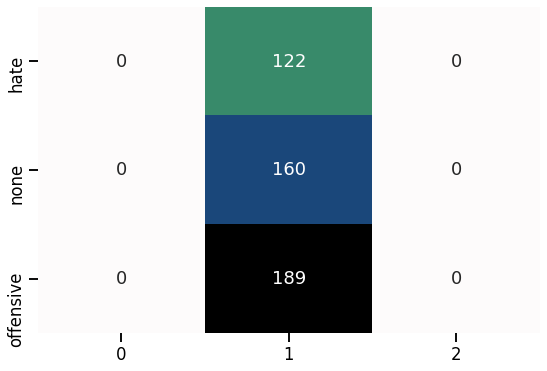

              precision    recall  f1-score   support

        hate       0.00      0.00      0.00       122
        none       0.34      1.00      0.51       160
   offensive       0.00      0.00      0.00       189

    accuracy                           0.34       471
   macro avg       0.11      0.33      0.17       471
weighted avg       0.12      0.34      0.17       471



In [158]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=5, multi_class='multinomial', solver='saga', max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_dev)
heatconmat(y_dev, y_pred)